In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import scipy.stats as ss
style.use("seaborn")
%matplotlib inline

from IPython.display import display
# from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# import bqplot.pyplot as bq

import warnings
warnings.filterwarnings("ignore")


# Regresión lineal Simple

In [2]:
def ran_scatter(x_med=0, 
                x_desv=1,
                x_n=100,
                pendiente=0,
                intercepto=0,
                desv_error=1.0,
                transparencia=0.75):
#     plt.figure(2)
    x_rand=np.random.normal(x_med,x_desv,x_n)
    reg_error=np.random.normal(0,x_desv*desv_error,x_n)
    y_pred=(x_rand*pendiente)+intercepto+reg_error
    x_line = np.linspace(min(x_rand)-(min(x_rand)*.1), 
                             max(x_rand)+(max(x_rand)*.1)
                             , 100)
    y_line=(x_line*pendiente)+intercepto
    plt.figure(figsize=(12,12))
    plt.scatter(x_rand, y_pred, alpha=transparencia)
    plt.plot(x_line, y_line,'--', linewidth=2)
    plt.axes().set_aspect('equal', 'datalim')#plt.set_aspect('equal')
    plt.show()


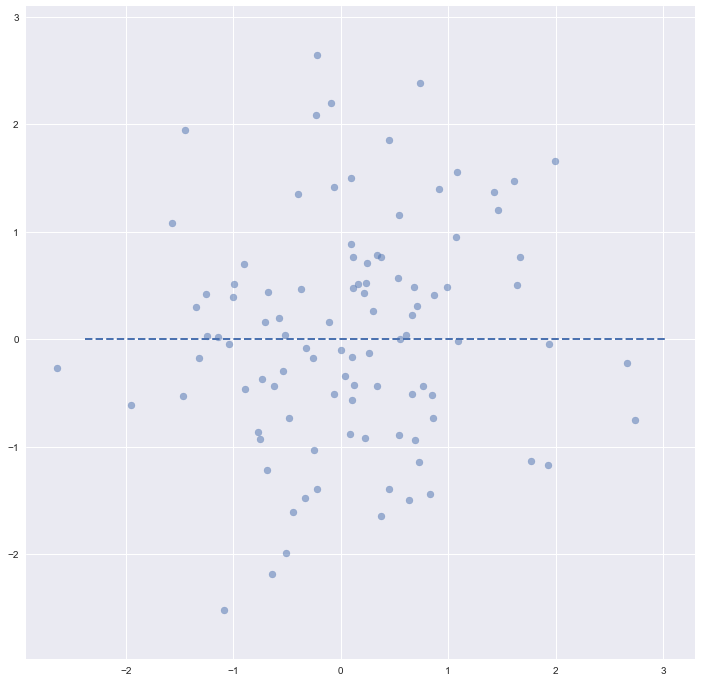

In [3]:
x_med = widgets.IntSlider(value=0,
                          min=-150,
                          max=150,
                          description='Promedio')

x_desv = widgets.FloatSlider(value=1,
                             min=1,
                             max=50,
                             step=.1,
                             description='Desv Estándar',
                              readout_format='.1f')

x_n = widgets.IntSlider(value=100,
                        min=2,
                        max=1500,
                        description='Tam muestral')

pendiente=widgets.FloatSlider(value=0,
                              min=-1,
                              max=1,
                              step=.01,
                              description='Pendiente',
                              readout_format='.2f')

intercepto= widgets.IntSlider(value=0,
                              min=-150,
                              max=150,
                              description='Intercepto')


desv_error=widgets.FloatSlider(value=1,
                               min=0,
                               max=1.5,
                               step=.01,
                               description='Dispersión',
                               readout_format='.2f')

transparencia=widgets.FloatSlider(value=0.5,
                                  min=0,
                                  max=1,
                                  step=.01,
                                  description='Transparencia',
                                  readout_format='.2f')

out = widgets.interactive_output(ran_scatter, {'x_med': x_med, 
                                               'x_desv': x_desv, 
                                               'x_n': x_n,
                                               'pendiente':pendiente,
                                               'intercepto':intercepto,
                                               'desv_error':desv_error,
                                               'transparencia':transparencia})

widgets.HBox([widgets.VBox([x_med, x_desv, x_n, pendiente,intercepto,desv_error,transparencia]), out])


In [4]:
# interact_randscatter = interactive(ran_scatter, 
#                                    x_med=(5,150), 
#                                    x_desv=(1,50), 
#                                    x_n=(10,2500), 
#                                    pendiente=(-1.0,1.0,.01), 
#                                    intercepto=(0,100),
#                                    transparencia=(0.0, 1.0, .01),
#                                    desv_error=(0.0,1.5,.01))
# interact_randscatter